# This project builds a model by separating our training set into training and validation set. Then, it evaluates a model on a test set in order to see the performance of our model.

In [1]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
#Let's load the dataset from the internet
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [3]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [4]:
#@title Functions that build and train a model
def build_model(my_learning_rate):
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Addding one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compiling the model topography into code that TensorFlow can efficiently
  # execute. Configuring training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feeding a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gathering the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolating the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [5]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
145/145 [==============================] - 0s 2ms/step - loss: 40326.8906 - root_mean_squared_error: 200.8156 - val_loss: 30751.8145 - val_root_mean_squared_error: 175.3620
Epoch 2/30
145/145 [==============================] - 0s 2ms/step - loss: 22247.4609 - root_mean_squared_error: 149.1558 - val_loss: 16222.9834 - val_root_mean_squared_error: 127.3695
Epoch 3/30
145/145 [==============================] - 0s 2ms/step - loss: 11399.1465 - root_mean_squared_error: 106.7668 - val_loss: 8802.7695 - val_root_mean_squared_error: 93.8231
Epoch 4/30
145/145 [==============================] - 0s 2ms/step - loss: 7278.1431 - root_mean_squared_error: 85.3120 - val_loss: 7380.1245 - val_root_mean_squared_error: 85.9077
Epoch 5/30
145/145 [==============================] - 0s 1ms/step - loss: 6954.5903 - root_mean_squared_error: 83.3942 - val_loss: 7367.7246 - val_root_mean_squared_error: 85.8354
Epoch 6/30
145/145 [==============================] - 0s 1ms/step - loss: 6953.0381 - root

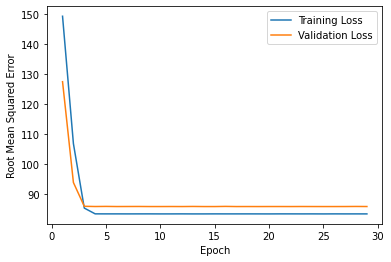

In [10]:
learning_rate = 0.08
epochs = 30
batch_size = 100

# Spliting the original training set into a reduced training set and a
# validation set. 
validation_split=0.15

# Identifing the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

# Discarding any pre-existing version of the model.
my_model = None

shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
# Invoking the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [11]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


In [12]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 7011.7881 - root_mean_squared_error: 83.7364


## To conclude, RMSE of the training set, validation set and test set are about the same, which makes our model quite good.